# Probability II

Christiaan van Roon - 11122854
Sander Hansen - 10995080

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 1 Uniform Distribution
Consider a $RV\ X \sim $Uniform$(3,9)$ we consider this as a continues function.

+ *Give the formula for the cumulative distribution function $F_x(x)$.*

   First we will get the probability density function which is:
   
   $$
   \begin{split}p_X(x) = \begin{cases}
       0 &: x < 3\\
       \frac{3}{9} &: 3\leq x \leq 9\\
       0 &: x > 9
   \end{cases}\end{split}
   $$
   
   After that we can give the *cumulative distribution function*.
   
   $$
   \begin{split}F_X(x) = \begin{cases}
       0 &: x < 3\\
       \frac{x-3}{6} &:3\leq x \leq 9\\
       1 &: x > 9
   \end{cases}\end{split}
   $$

+ *Make a plot of that function in Numpys/Matplotlib. The numpy piecewise function can be of some help.* 

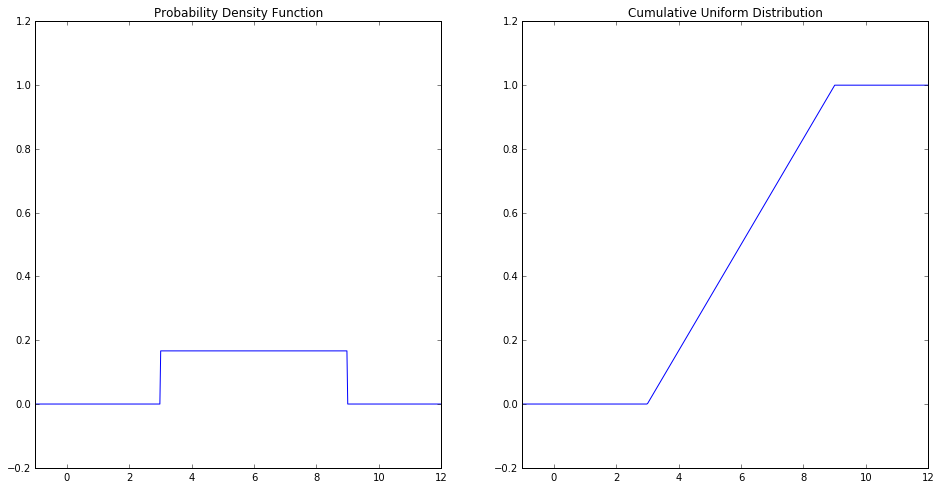

In [2]:
def f_PDF(x):
    if x <= 9 and x >= 3:
        return 1/6
    return 0

def f_UDF(x):
    if x <= 9 and x >= 3:
        return (x-3) / 6
    elif x > 9:
        return 1

    return 0

t = np.linspace(-1,12, 500)
y_1 = [f_PDF(i) for i in t]
y_2 = [f_UDF(i) for i in t]

plt.figure(figsize=(16,8), facecolor='white')
plt.subplot(1,2,1)
plt.axis([-1,12,-0.2,1.2])
plt.title('Probability Density Function')
plt.plot(t,y_1)

plt.subplot(1,2,2)
plt.axis([-1,12,-0.2,1.2])
plt.plot(t,y_2)
plt.title('Cumulative Uniform Distribution')
plt.show()

+ *Calculate $P(-2 \leq X \leq 4)$*

   We can use the cumulative function from the previous question for    this. If we fill in the formula correctly we will get the following:
   
   $$
   F_X(4) = \frac{4-3}{6}
   $$
   
   Which will lead to $1/6$. So P = $\frac{1}{6}$
   
   
+ *What is $P(a \leq X \leq b)$ where both a and b are in [3,9]?* 

   We can use the same formula as we used above:
   
   $$
   \text{a and b are in } [3,9] \implies P(a \leq X \leq b) = \frac{x-3}{6}
   $$

## 2 Flipping a coin
We flip a coin where $P('Tails') = p$ and $p$ is not necessarily $0.5$. We repeat the experiment $n$ times and let $X$ be the random variable that counts how many times $k$ we have 'tails' up.

* *What are the possible outcomes of this experiment? I.e. what are the values of $X$ where $p_X(k) \neq 0$.*
   
   The outcomes of $X$ run from $0$ to $n$ and the probability of finding $k$ successes is: $$p_x(x) = P(X = k) = {{n}\choose{k}} p^k (1 - p)^{n-k}$$
   
* *Give a formula for $p_X(j)$ and make several plots in matplotlib for $n = 20$ and for values of $p$ equal to $0.25, 0.5$ and $0.75$. Make sure each plot shows the value of $p$.*

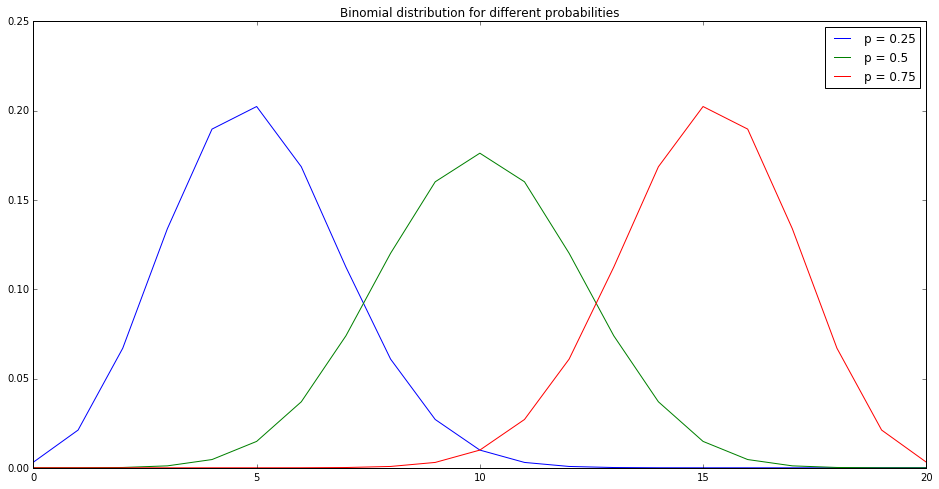

In [3]:
def binomial(n, j, p):
    return (np.math.factorial(n) / (np.math.factorial(j) * np.math.factorial(n-j))) * (p**j) * (1-p)**(n-j)

x = np.linspace(0, 20, 21)
y_1 = [binomial(20, i, 0.25) for i in x]
y_2 = [binomial(20, i, 0.5) for i in x]
y_3 = [binomial(20, i, 0.75) for i in x]

plt.figure(figsize=(16,8), facecolor='white')
plt.plot(x,y_1, x, y_2, x, y_3)
plt.legend(['p = 0.25', 'p = 0.5', 'p = 0.75'])
plt.title('Binomial distribution for different probabilities')
plt.show()


h = np.linspace(0, 300, 301)

* *Show that:* $$\sum_{h=-\infty}^{\infty} p_X(k) = 1$$ 

   *Math savvy students may give an actual proof (with line by line explanation), computer scientists may check this equality calculating the sum for different values of $n$.*

In [4]:
for n in [300, 400, 500]:
    results = [binomial(n, k, 0.5) for k in h]
    print('n is = ' + str(n) + ' result is: ' + str(sum(results)))

n is = 300 result is: 1.0
n is = 400 result is: 1.0
n is = 500 result is: 0.999997074222


## 3 Sum of Uniform Distributed Random Variables
Consider the random variable $X\ \sim\ Uniform(-1,1)$

* *In Python you can draw 10000 samples from this distribution with the function numpy.random.uniform(low=-1,high=1,size=10000). Make a histogram of these values and normalize the bin counts to approximate the probability density function. Plot this histogram.*

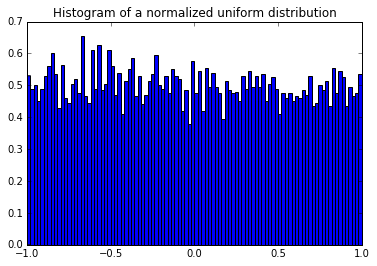

In [5]:
n = np.random.uniform(-1,1,10000)
plt.hist(n, 100, normed=True)
plt.title('Histogram of a normalized uniform distribution')
plt.show()

* *Now we consider 2 iid random variables $X_1$ and $X_2$ with pdf 𝖴niform(−1,1). Draw 10000 samples from both random variables resulting in 10000 tuples $(x_1,x_2)$. Plot all these points as a dot in the plane in matplotlib.*

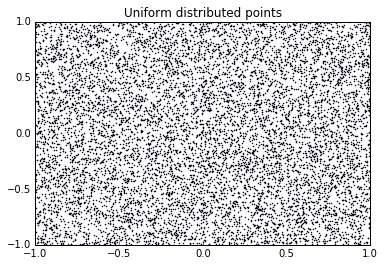

In [6]:
x_1 = np.random.uniform(-1, 1, 10000)
x_2 = np.random.uniform(-1, 1, 10000)
plt.plot(x_1, x_2, 'o', markersize=1)
plt.title('Uniform distributed points')
plt.show()


* *Now we define the random variable $S_2 = X_1 + X_2$. Plot a histogram of the 10000 $S_2$ values. Normalize the histogram to approximate the pdf of $S_2$ (Hint the binwidth in the histogram is important too).*

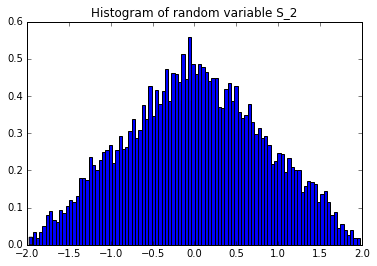

In [7]:
s_2 = x_1 + x_2
plt.hist(s_2, 100, normed=True)
plt.title('Histogram of random variable S_2')
plt.show()

* *Now do the same for $S_3\ =\ X_1 + X_2 + X_3$ and for $S_5$ and for $S_10.$*

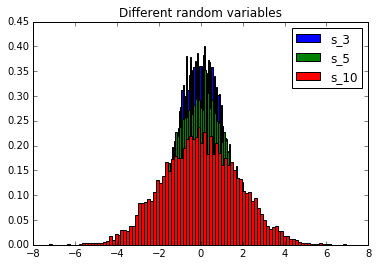

In [8]:
s_3 = np.sum(np.random.uniform(-1, 1, size = (10000, 3)) ,axis=1)
s_5 = np.sum(np.random.uniform(-1, 1, size = (10000, 5)) ,axis=1)
s_10 = np.sum(np.random.uniform(-1, 1, size = (10000, 10)) ,axis=1)

plt.hist(s_3, 100, normed=True)
plt.hist(s_5, 100, normed=True)
plt.hist(s_10, 100, normed=True)

plt.title('Different random variables')
plt.legend(['s_3','s_5', 's_10'])
plt.show()

* *Calculate the sample variance for all $S_i$ (including $S_1=X_1$). Plot these variances as function of $i$.*

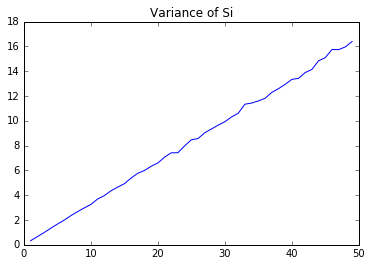

In [9]:
Si_Max = 50

x = np.arange(1, Si_Max)
variance = np.empty(Si_Max - 1)

for i in range(1, Si_Max):
    Si = np.sum(np.random.uniform(-1, 1, size = (10000, i)) ,axis=1)
    variance[i - 1] = np.var(Si)

plt.plot(x,variance)
plt.title('Variance of Si')
plt.show()    

* *Can you explain the last plot?*

  The variance is dependent of the amount of random variables. Therefor it is logic that the variance is ricing linear with the amount of random variables. 



## 4 Normal Distribution

+ *Write your own function standard_normal_pdf(x) that calculates the probability density function of the standard normal distribution.*

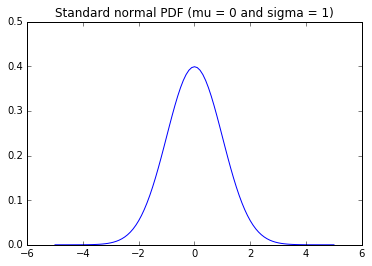

In [10]:
def standard_normal_pdf(x):
    return np.e**(-0.5 * (x**2)) / np.sqrt(2 * np.pi)

x = np.linspace(-5, 5, 101)
y = standard_normal_pdf(x)

plt.plot(x,y)
plt.axis([-6, 6, 0, 0.5])
plt.title('Standard normal PDF (mu = 0 and sigma = 1)')
plt.show()

+ *Write your own function normal_pdf(x, mu, sigma) that calculates the pdf of the normal distribution using one call to the standard_normal_pdf function.*

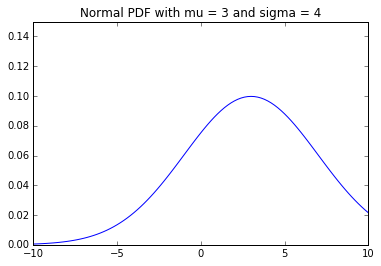

In [11]:
def normal_pdf(x, mu, sigma):
    return standard_normal_pdf((x- mu) * 1/sigma) * 1/sigma

x = np.linspace(-10, 10, 101)
y = normal_pdf(x, 3, 4)

plt.plot(x,y)
plt.axis([-10,10,0,0.15])
plt.title('Normal PDF with mu = 3 and sigma = 4')
plt.show()

+ *The cumulative distribution function for the normal distribution can not be written down in an analytical expression. A special function needs to be written. Fortunately we can use the scipy.special.erf function. Without proof we state that standard_normal_cdf(x) can be defined as:*

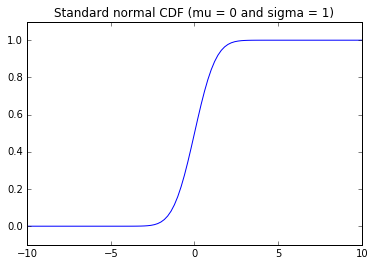

In [12]:
import scipy.special;

def standard_normal_cdf(x):
    return 0.5 * (1 + scipy.special.erf(x/np.sqrt(2)))

plt.plot(x, standard_normal_cdf(x))
plt.axis([-10, 10, -0.1, 1.1])
plt.title('Standard normal CDF (mu = 0 and sigma = 1)')
plt.show()

+ *Use this function to write the function normal_cdf(x, mu, sigma).*

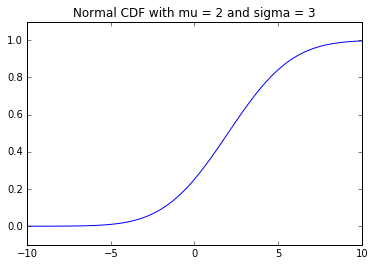

In [13]:
def normal_cdf(x, mu, sigma):
    return standard_normal_cdf((x - mu) / sigma)

plt.plot(x, normal_cdf(x, 2,3))
plt.axis([-10, 10, -0.1, 1.1])
plt.title('Normal CDF with mu = 2 and sigma = 3')
plt.show()

+ *In one figure plot the pdf and cdf of 𝖭ormal(3,$2^2$).*

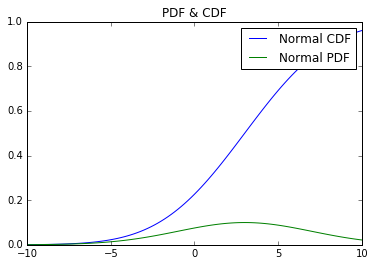

In [14]:
plt.plot(x, normal_cdf(x, 3, 4))
plt.plot(x, normal_pdf(x, 3, 4))
plt.legend(['Normal CDF', 'Normal PDF'])
plt.title('PDF & CDF')
plt.show()

+ *We can draw a number from the standard normal distribution using the function numpy.random.normal(loc=mu, scale=sigma, size=None). Use this function to draw 10000 numbers in one call of 𝖭ormal(3,$2^2$). Make a histogram of all the 10000 numbers and scale it to be an approximation of the pdf. Also plot the pdf on top of the histogram.*

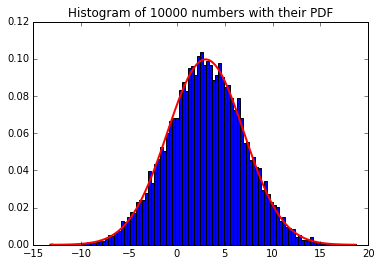

In [15]:
s = np.random.normal(loc=3, scale = 4, size = 10000)

_, bins, _ = plt.hist(s, 100, normed=True)
y = normal_pdf(bins, 3, 4)

plt.plot(bins, y, linewidth=2, color='r')
plt.title('Histogram of 10000 numbers with their PDF')
plt.show()


+ *We refer to the previous exercise where we have plotted histograms of the mean value of 100 draws from a uniform distribution. For that random variable calculate the mean and standard deviation and use these to plot the pdf of a normal distribution with the same mean and standard deviation.*

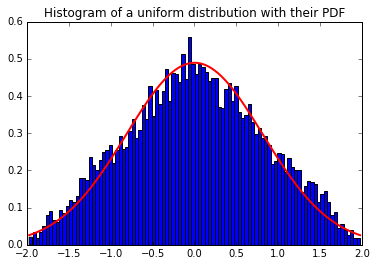

In [16]:
mean = np.mean(s_2)
std = np.std(s_2)

_, bins, _ = plt.hist(s_2, 100, normed=True)
y = normal_pdf(bins, mean, std)

plt.plot(bins, y, linewidth=2, color='r')
plt.title('Histogram of a uniform distribution with their PDF')
plt.show()